In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
import json

with open("../result/1d_n10_slope_circuit200.json") as f:
    res = json.load(f)

cycle_depths = np.arange(1, 51)

In [11]:
def average_over_runs(n: int):
    averaged = {}
    for e, runs in res.items():
        averaged[e] = np.mean(runs[:n], axis=0)
    return averaged

def plot_runs(runs: np.ndarray, max_depth: int = 50):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_yscale("log")
    for e_pauli, xebs in runs.items():
        ax.plot(cycle_depths[:max_depth-1], xebs[:max_depth-1], label=f"e_pauli={float(e_pauli):.2e}")
    ax.set_xlabel("Cycle Depth")
    ax.set_ylabel("XEB")
    ax.legend()

In [26]:
averaged = average_over_runs(100)

plot_runs(averaged, max_depth=40)

def average_and_plot(n: int):
    averaged = average_over_runs(n)
    plot_runs(averaged, max_depth=40)


<IPython.core.display.Javascript object>

ValueError: cannot find widget or abbreviation for argument: 'n'

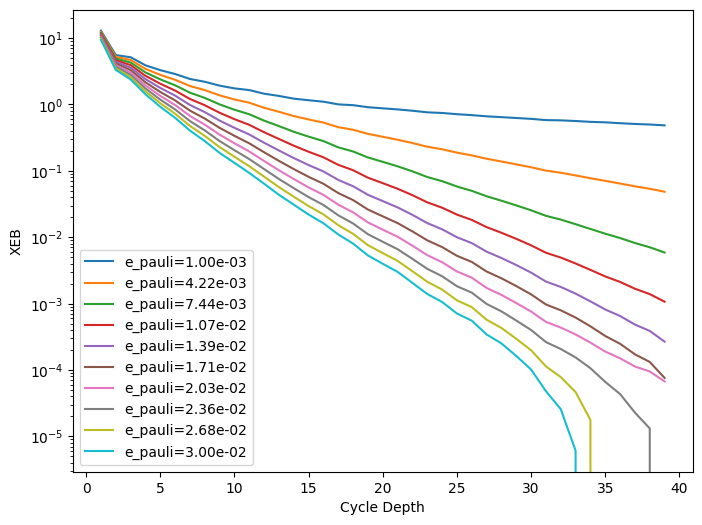

In [20]:
averaged = average_over_runs(200)

plot_runs(averaged, max_depth=40)

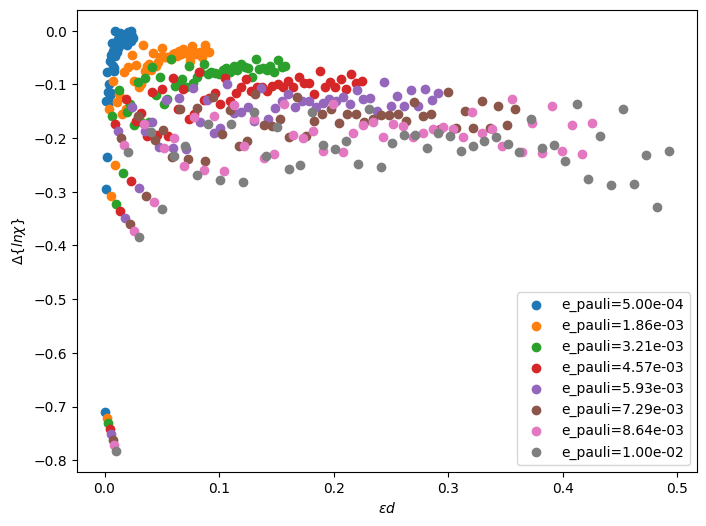

In [15]:
xeb_ratios = {}
for e_pauli, xebs in res.items():
    xebs = np.asarray(xebs)
    ratio = xebs[1:] / xebs[:-1]
    xeb_ratios[float(e_pauli)] = np.log(ratio)

fig, ax = plt.subplots(figsize=(8, 6))
for e_pauli, ratios in xeb_ratios.items():
    ax.plot(-np.log(1 - e_pauli) * cycle_depths[:-1], ratios, label=f"e_pauli={e_pauli:.2e}")
ax.set_xlabel("$\epsilon d$")
ax.set_ylabel(r"$\Delta \{ ln\chi \}$")
ax.legend()

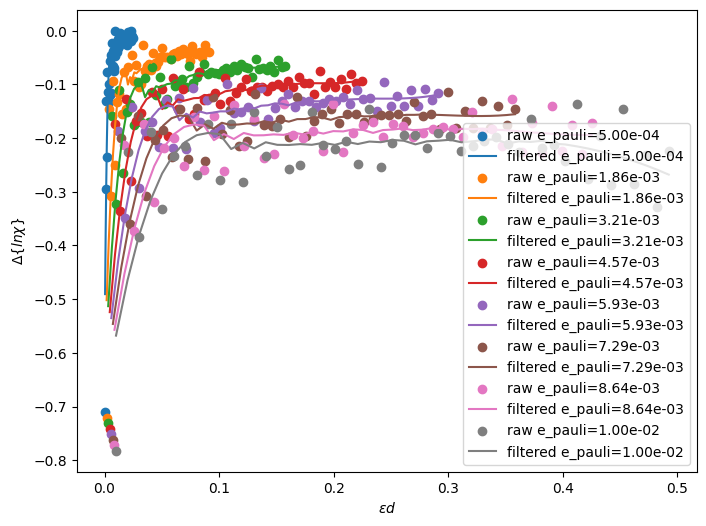

In [37]:
# simple filter
from scipy.signal import savgol_filter

fig, ax = plt.subplots(figsize=(8, 6))
for e_pauli, ratios in xeb_ratios.items():
    xs = -np.log(1 - e_pauli) * cycle_depths[:-1]
    filtered_ratios = savgol_filter(ratios, 20, 3)
    ax.scatter(xs, ratios, label=f"raw e_pauli={e_pauli:.2e}")
    ax.plot(xs, filtered_ratios, label=f"filtered e_pauli={e_pauli:.2e}")
ax.set_xlabel("$\epsilon d$")
ax.set_ylabel(r"$\Delta \{ ln\chi \}$")
ax.legend()

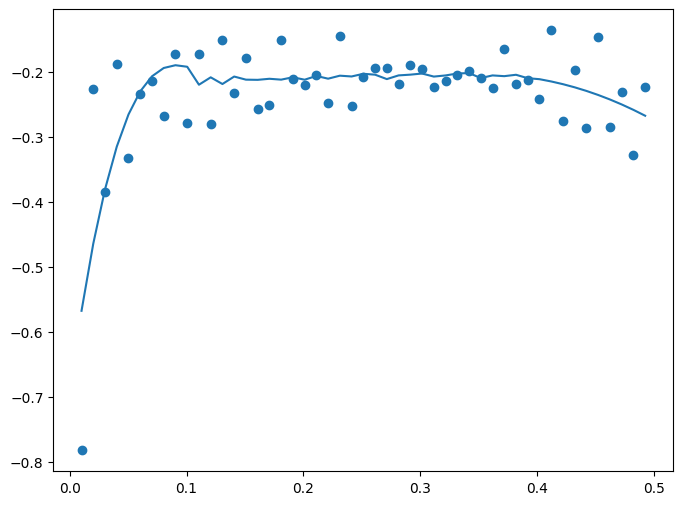

In [35]:
from scipy.signal import savgol_filter

rs = xeb_ratios[0.01]
filtered_rs = savgol_filter(rs, 20, 3)
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(-np.log(1 - 0.01) * cycle_depths[:-1], rs, label="raw")
ax.plot(-np.log(1 - 0.01) * cycle_depths[:-1], filtered_rs, label="filtered")